In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler


In [158]:
cust_dt = pd.read_csv("Wholesale customers data.csv")
cust_dt.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [159]:
cust_dt.shape

(440, 8)

In [160]:
cust_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [161]:
cust_dt.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [162]:
cust_dt.isnull().sum().to_frame().rename(columns = {0:"Total number of missing val."})

,Total number of missing val.
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [163]:
print("Duplicate values =", cust_dt.duplicated().sum())

Duplicate values = 0


In [164]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cust_dt)
cust_dt = pd.DataFrame(scaled_data,columns = cust_dt.columns)
cust_dt.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [165]:
x = cust_dt.drop("Channel", axis = 1)
y = cust_dt.Channel

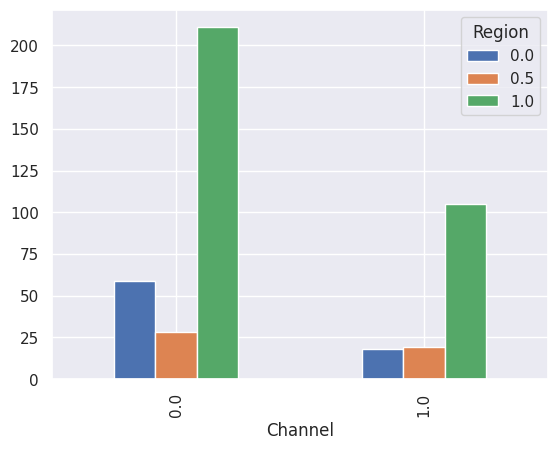

Region   0.0  0.5  1.0
Channel               
0.0       59   28  211
1.0       18   19  105


In [166]:
def categorical_multi(i,j):
    pd.crosstab(cust_dt[i],cust_dt[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(cust_dt[i],cust_dt[j]))

categorical_multi(i='Channel',j='Region')    

In [167]:
cust_dt.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

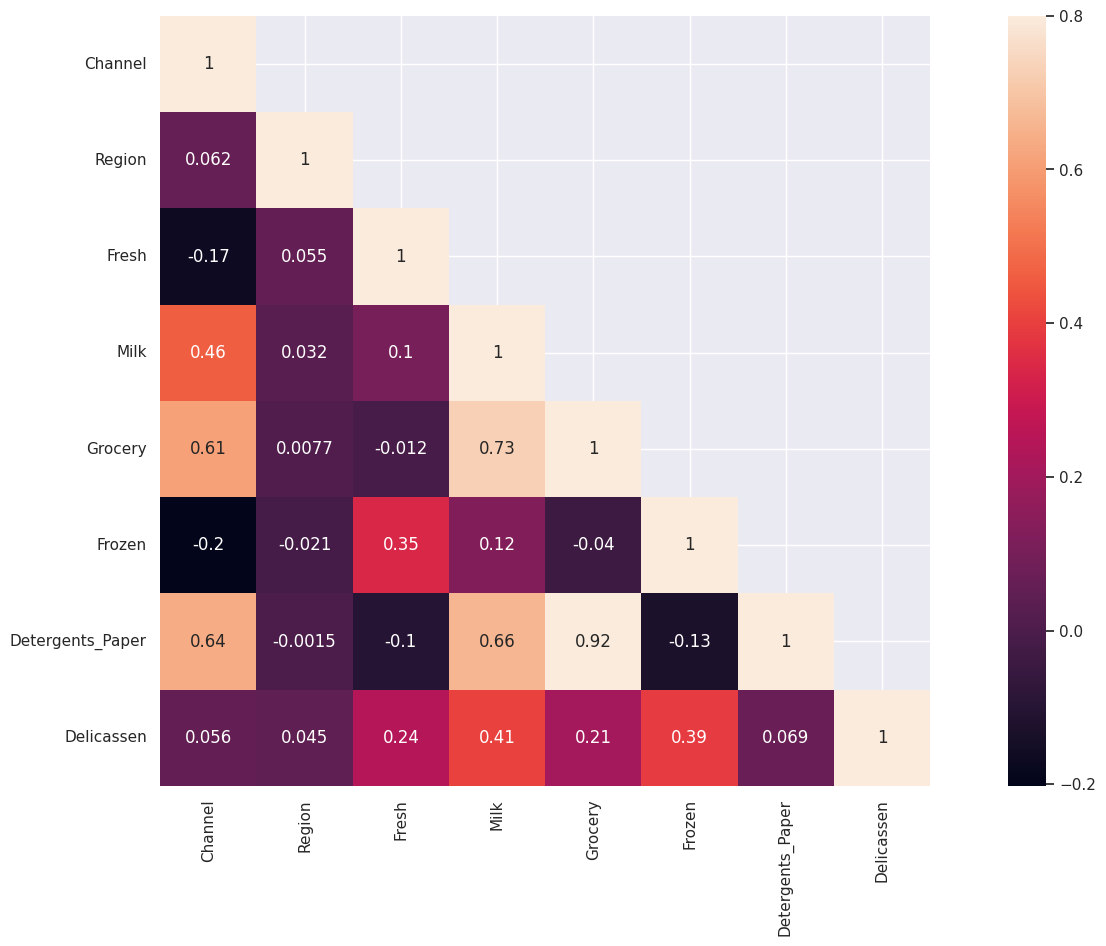

In [168]:
corrMatt = cust_dt.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<Axes: >

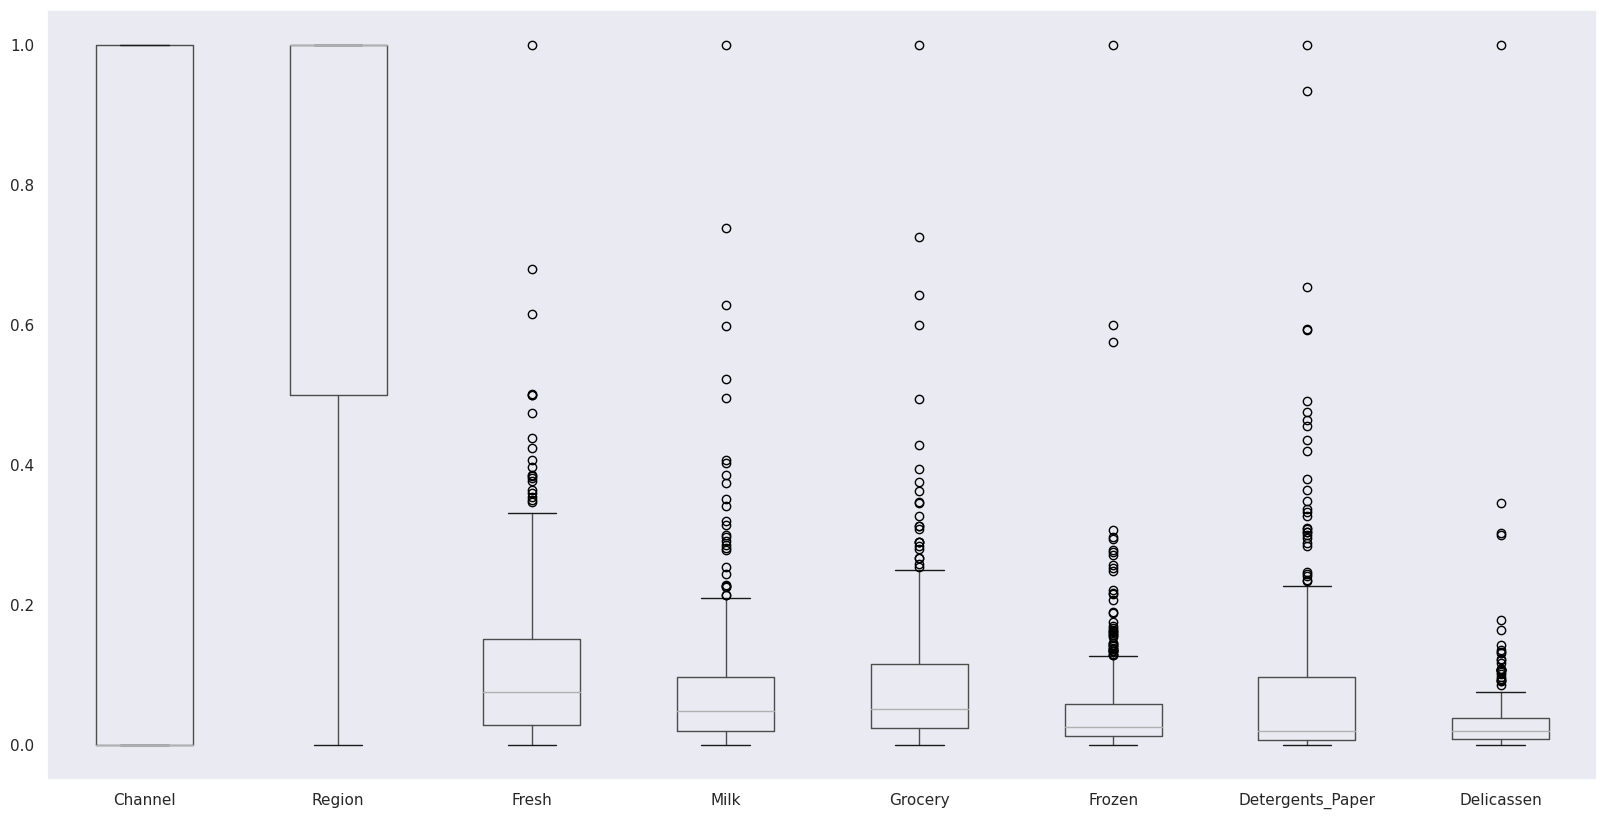

In [169]:
fig = plt.figure(figsize = (20,10))
cust_dt.boxplot(column=[name for name in list(cust_dt)], grid=False)

In [170]:
cust_dt.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='Density'>

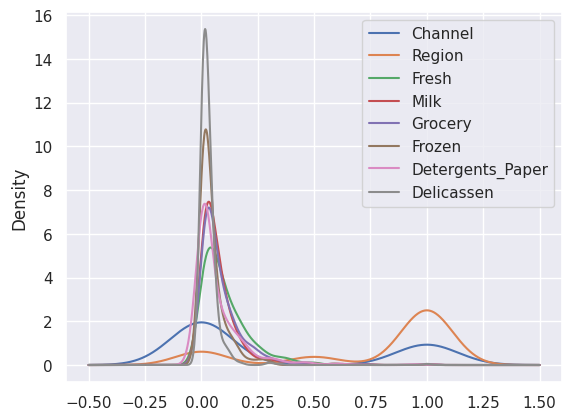

In [171]:
pd.DataFrame(cust_dt).plot(kind='kde')

<Axes: ylabel='Frequency'>

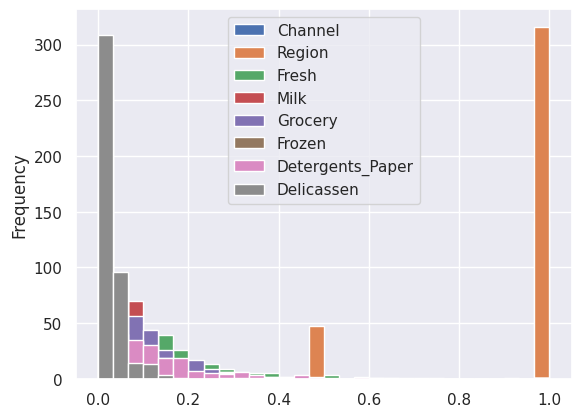

In [172]:
pd.DataFrame(cust_dt).plot(kind='hist', bins=30)

In [173]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cust_dt)
cust_dt = pd.DataFrame(scaled_data,columns = cust_dt.columns)
cust_dt.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [175]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = sm.add_constant(x)

In [176]:
lr = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.320103
         Iterations 8


In [177]:
def df_of_vif_pvalue():
    p_value_df = pd.DataFrame(lr.pvalues.apply(lambda x: round(x,6))).reset_index()
    p_value_df.columns=["feature_names",'p_values']
    def VIF(x):
        vif_df = pd.DataFrame()
        vif_df["feature_names"] = x.columns
        vif_df["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
        vif_df["vif"] = round(vif_df["vif"],2)
        vif_df = vif_df.sort_values(by = "vif",ascending = False)
        return vif_df
    global vif_pvalue_df
    vif_pvalue_df = pd.merge(p_value_df,VIF(x), on = "feature_names")
    return vif_pvalue_df

In [178]:
def High_vif_pvalue(vif_pvalue_df):
    global lst_feature_to_del
    lst_feature_to_del = []
    '''vif_pvalue is a DataFrame having pvalues and vif'''
    for i in range(len(vif_pvalue_df)):
        if vif_pvalue_df["vif"][i] > 5 and vif_pvalue_df["p_values"][i] >0.05:
            lst_feature_to_del.append(vif_pvalue_df["feature_names"][i])
    return lst_feature_to_del

In [181]:
df_of_vif_pvalue()
vif_pvalue_df

,feature_names,p_values,vif
0,Region,0.000000,2.11
1,Fresh,0.053870,2.13
2,Milk,0.442769,4.10
3,Grocery,0.631776,14.54
4,Frozen,0.000019,1.80
5,Detergents_Paper,0.000000,11.03
6,Delicassen,0.727484,1.96


In [182]:
High_vif_pvalue(vif_pvalue_df)
lst_feature_to_del

['Grocery']

In [183]:
x.drop("Grocery",inplace = True,axis = 1)

In [184]:
df_of_vif_pvalue()

,feature_names,p_values,vif
0,Region,0.000000,2.03
1,Fresh,0.053870,2.08
2,Milk,0.442769,3.80
3,Frozen,0.000019,1.79
4,Detergents_Paper,0.000000,2.73
5,Delicassen,0.727484,1.90


In [185]:
def check_pvalue(vif_pvalue_df,P_value_column):
    High_vif_features = {}
    for i,value in enumerate(P_value_column):
        if value > 0.05:
            High_vif_features[vif_pvalue_df.loc[i][0]] = value
    return High_vif_features

In [186]:
check_pvalue(vif_pvalue_df,vif_pvalue_df["p_values"])

{'Fresh': 0.05387, 'Milk': 0.442769, 'Delicassen': 0.727484}

In [187]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=36)

In [188]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((352, 6), (352,), (88, 6), (88,))

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [190]:
model_params = {
    'svc': {'model': SVC(gamma ="auto"),
            'params' : {
                "C" :[1, 10,100,201],
                'kernel': [ 'rbf','linear']}
           },
    "random_forest": {'model' : RandomForestClassifier(),
                      'params' : {'n_estimators' : [200,250,100,150,300]}
                     },
    'logistic_regression' : {
        'model' : LogisticRegression(solver = "liblinear"),
        'params':{"C" : [1,5,10,50]}
    },
    "GradientBoostingClassifier":{"model": GradientBoostingClassifier(),
                                "params" : {'learning_rate':[0.1,0.2,0.3,0.4],'n_estimators':list(range(1,300,50)),'subsample':[1.0,2.0,3.0,4.0],'criterion':['friedman_mse']}
                                  },
    "KNN" : {"model" : KNeighborsClassifier(),
            "params" : {"n_neighbors":list(range(3,35,6)),'weights':['uniform'],'algorithm':['auto'],'leaf_size':list(range(10,100,15)),'p':[2,4,5,6],'metric':['minkowski']}
            }
    }

In [191]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp['params'], cv =10, return_train_score = False)
    clf.fit(x, y)
    scores.append({
        "model" : model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_})
mod_df = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df

,model,best_score,best_params
0,svc,0.911364,"{'C': 201, 'kernel': 'rbf'}"
1,random_forest,0.920455,{'n_estimators': 250}
2,logistic_regression,0.902273,{'C': 50}
3,GradientBoostingClassifier,0.920455,"{'criterion': 'friedman_mse', 'learning_rate':..."
4,KNN,0.879545,"{'algorithm': 'auto', 'leaf_size': 10, 'metric..."


In [192]:
model_params = {
    'decision_tree': {'model': DecisionTreeClassifier(),
            'params' : {
                "criterion" :["gini", "entropy", "log_loss"],
                'splitter': [ 'best'],
                "min_samples_split": [2,4,6],
                'random_state': [36]}
           },
    "AdaBoostDT": {'model' : AdaBoostClassifier(),
                   'params' : {'n_estimators' : [10,50,100,150,200],
                               'learning_rate':[0.1,0.2,0.3,0.4],
                               "algorithm" : ['SAMME', 'SAMME.R']}
                     },
    "AdaBoostRandomForest": {'model' : AdaBoostClassifier(),
                   'params' : {"base_estimator":[RandomForestClassifier()],
                               'n_estimators' : [400,250,300,450,200],
                               'learning_rate':[0.1,0.2,0.3,0.4],
                               "algorithm" : ['SAMME', 'SAMME.R']}
                     },
    'xgboost_classifier' : {'model' : XGBClassifier(),
        'params':{"n_estimators" : [1,30,100,150,200],
                 'learning_rate':[0.1,0.2,0.3,0.4],
                 }
                           }
}

In [193]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp['params'], cv =10, return_train_score = False)
    clf.fit(x, y)
    scores.append({
        "model" : model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_})
mod_df1 = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df1

,model,best_score,best_params
0,decision_tree,0.865909,"{'criterion': 'gini', 'min_samples_split': 2, ..."
1,AdaBoostDT,0.922727,"{'algorithm': 'SAMME', 'learning_rate': 0.4, '..."
2,AdaBoostRandomForest,0.925000,"{'algorithm': 'SAMME', 'base_estimator': Rando..."
3,xgboost_classifier,0.925000,"{'learning_rate': 0.4, 'n_estimators': 100}"


In [194]:
modeles_df = pd.concat([mod_df,mod_df1]).set_index('model',drop = True)
modeles_df

,best_score,best_params
model,,
svc,0.911364,"{'C': 201, 'kernel': 'rbf'}"
random_forest,0.920455,{'n_estimators': 250}
logistic_regression,0.902273,{'C': 50}
GradientBoostingClassifier,0.920455,"{'criterion': 'friedman_mse', 'learning_rate':..."
KNN,0.879545,"{'algorithm': 'auto', 'leaf_size': 10, 'metric..."
decision_tree,0.865909,"{'criterion': 'gini', 'min_samples_split': 2, ..."
AdaBoostDT,0.922727,"{'algorithm': 'SAMME', 'learning_rate': 0.4, '..."
AdaBoostRandomForest,0.925000,"{'algorithm': 'SAMME', 'base_estimator': Rando..."
xgboost_classifier,0.925000,"{'learning_rate': 0.4, 'n_estimators': 100}"


In [195]:
best_parameter_for_AdaBoostRandomForest = modeles_df.loc["AdaBoostRandomForest"]['best_params']
best_parameter_for_AdaBoostRandomForest

{'algorithm': 'SAMME',
 'base_estimator': RandomForestClassifier(),
 'learning_rate': 0.1,
 'n_estimators': 250}

In [196]:
model = AdaBoostClassifier(algorithm = 'SAMME',
                           base_estimator = RandomForestClassifier(),
                           learning_rate = 0.2,
                           n_estimators = 200 )
model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=RandomForestClassifier(),
                   learning_rate=0.2, n_estimators=200)

In [197]:
y_test_pred = model.predict(x_test)

In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [199]:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[56,  2],
       [ 2, 28]])

In [200]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [201]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n\n',

'Precision/Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9545454545454546 

 Missclassifications = 1-Accuracy =  0.045454545454545414 

 Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.9333333333333333 

 Specificity or True Negative Rate = TN/(TN+FP) =  0.9655172413793104 

 Precision/Positive Predictive value = TP/(TP+FP) =  0.9333333333333333 

 Negative predictive Value = TN/(TN+FN) =  0.9655172413793104 

 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  27.0666666666667 

 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.06904761904761902


In [204]:
print("accuracy of best model(AdaBoostClassifier) : ",accuracy_score(y_test,y_test_pred)*100,"%")

accuracy of best model(AdaBoostClassifier) :  95.45454545454545 %


In [205]:
y_pred_prob = model.predict_proba(x_test)
y_pred_prob = y_pred_prob[:,1]

In [206]:
roc_auc_score_test = roc_auc_score(y_test,y_pred_prob)
roc_auc_score_test

0.9494252873563218

In [207]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

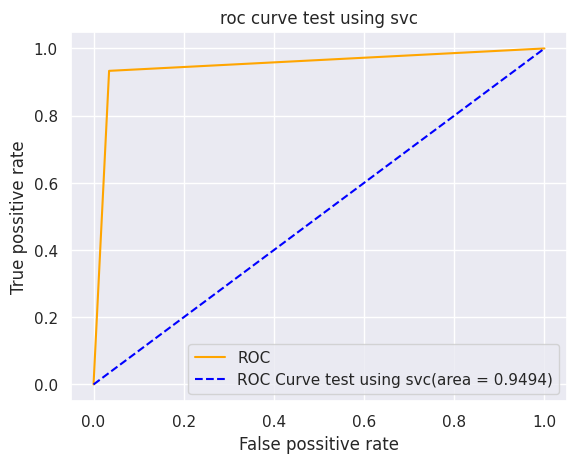

In [208]:
plt.plot(fpr,tpr,color= "orange",label = "ROC")
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROC Curve test using svc(area = %0.4f)' % roc_auc_score_test)
plt.xlabel('False possitive rate')
plt.ylabel('True possitive rate')
plt.title('roc curve test using svc')
plt.legend()
plt.show()